In [9]:
import os
import robustanno as anno
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Spatial transcriptomics: mouse brain sample

Trying to set attribute `.obs` of view, copying.


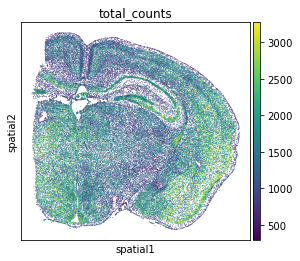

In [10]:
geneExpFile = "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.user/liulin4/projects/robustAnno/demo/T319_data_adjust.txt"
adata = anno.cellBin(geneExpFile)
adata = anno.preprocess(adata, pre = "ST", dataType = "ST")
adata = anno.rotate_theta(adata, theta = 180)
sc.pl.spatial(adata, color = "total_counts", spot_size = 50)

Clustering by leiden!


Trying to set attribute `._uns` of view, copying.


Clusters less than 20 cells are removed!


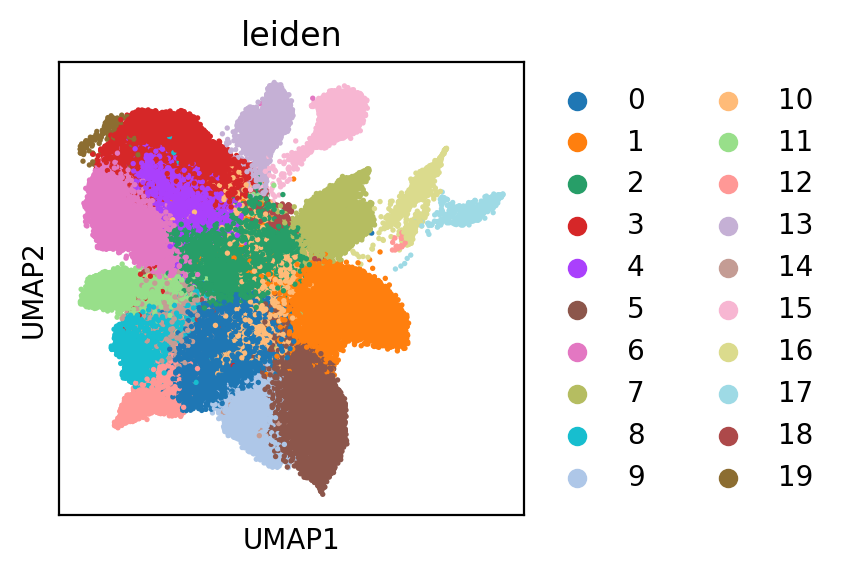

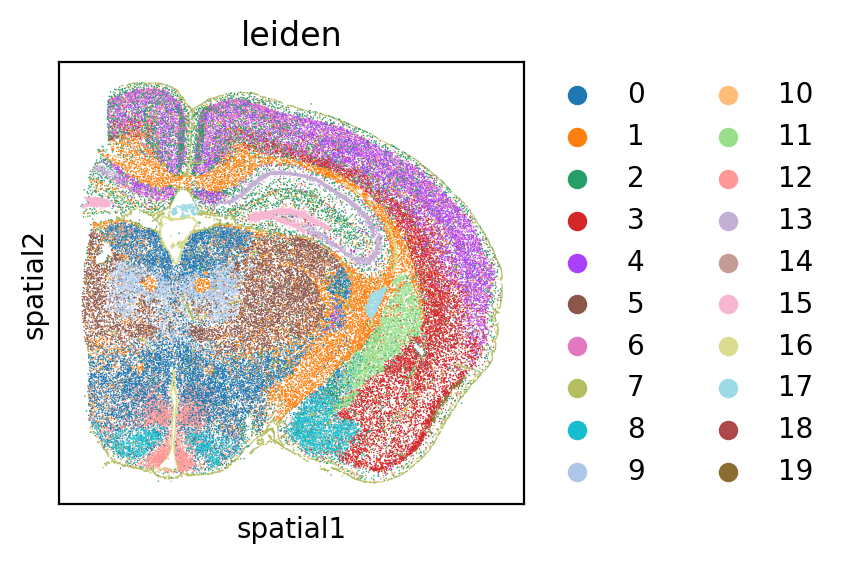

In [11]:
adata = anno.clustering(adata, method = "leiden", n_clusters = None, n_neighbors = 15, n_pcs = 30, r = 1, num_filter = 20)
plt.rcParams["figure.figsize"] = [3,3]
plt.rcParams["figure.dpi"] = 200
sc.pl.umap(adata, color = "leiden", s = 15, save = "T319_r1_leiden.png")
sc.pl.spatial(adata, color = "leiden", spot_size = 50, save = "T319_r1_leiden.png") 

In [12]:
marker_dict = {}
marker_dict["Choroid plexus"] = ["Ttr"]
marker_dict["Menings cell"] = ["Ptgds"]
marker_dict["Sst neuron"] = ["Sst"]
marker_dict["Lamp5 neuron"] = ["Lamp5"]
marker_dict["Ependymal cell"] = ["Ccdc153", "Tmem212"]
marker_dict["Vip neuron"] = ["Vip"]
marker_dict["Pvalb neuron"] = ["Pvalb"]
marker_dict["Sncg neuron"] = ["Sncg"]
marker_dict["Microglia"] = ["Tmem119", "Cst3", "P2ry12", "Iba1", "Aif1"]
marker_dict["DG neuron"] = ["Prox1", "C1ql2", "Nr3c2", "Tmem114", "Ntf3", "Ppp1r1a"]
marker_dict["CA2 neuron"] = ["Ccdc3"]
marker_dict["CA1 neuron"] = ["Fibcd1"]
marker_dict["CA pyramidal neuron"] = ["Hpca", "Tmsb3x"]
marker_dict["Striatum neuron"] = ["Penk", "Ppp1r1b", "Drd1", "Drd2", "Adora2a"]
marker_dict["Oligodendrocyte"] = ["Mbp", "Mag", "Mog", "Plp1", "Opalin"]
marker_dict["Astrocyte"] = ["Apoe","Gfap","Aqp4", "Aldh1l1"]
marker_dict["L6b"] = ["Cplx3", "Ctgf"]
marker_dict["Sncg neuron"] = ["Sncg"]
marker_dict["HPF neuron"] = ["Nrgn", "Olfm1"]
marker_dict["Thalamus neuron"] = ["Pcp4", "Prkcd", "Synpo2","Cbln1", "Megf11", "Cbln4"]
marker_dict["Hypothalamus neuron"] = ["Pmch", "Avp", "Oxt", "Hcrt", "Zwint", "Gap43", "Resp18", "Cartpt"]
marker_dict["Erythrocyte"] = ["Hbb-bs", "Hba-a2", "Hba-a1"]

Type and related decisive marker: ['Hypothalamus neuron: Pmch', 'Oligodendrocyte: Plp1', 'Erythrocyte: Hbb-bs', 'HPF neuron: Nrgn', 'HPF neuron: Nrgn', 'Thalamus neuron: Pcp4', 'HPF neuron: Nrgn', 'Menings cell: Ptgds', 'Hypothalamus neuron: Gap43', 'Thalamus neuron: Cbln1', 'Astrocyte: Apoe', 'Striatum neuron: Penk', 'Hypothalamus neuron: Resp18', 'CA pyramidal neuron: Hpca', 'Hypothalamus neuron: Zwint', 'HPF neuron: Nrgn', 'Ependymal cell: Ccdc153', 'Choroid plexus: Ttr', 'Microglia: Cst3', 'HPF neuron: Olfm1']
Annotated types are unique!


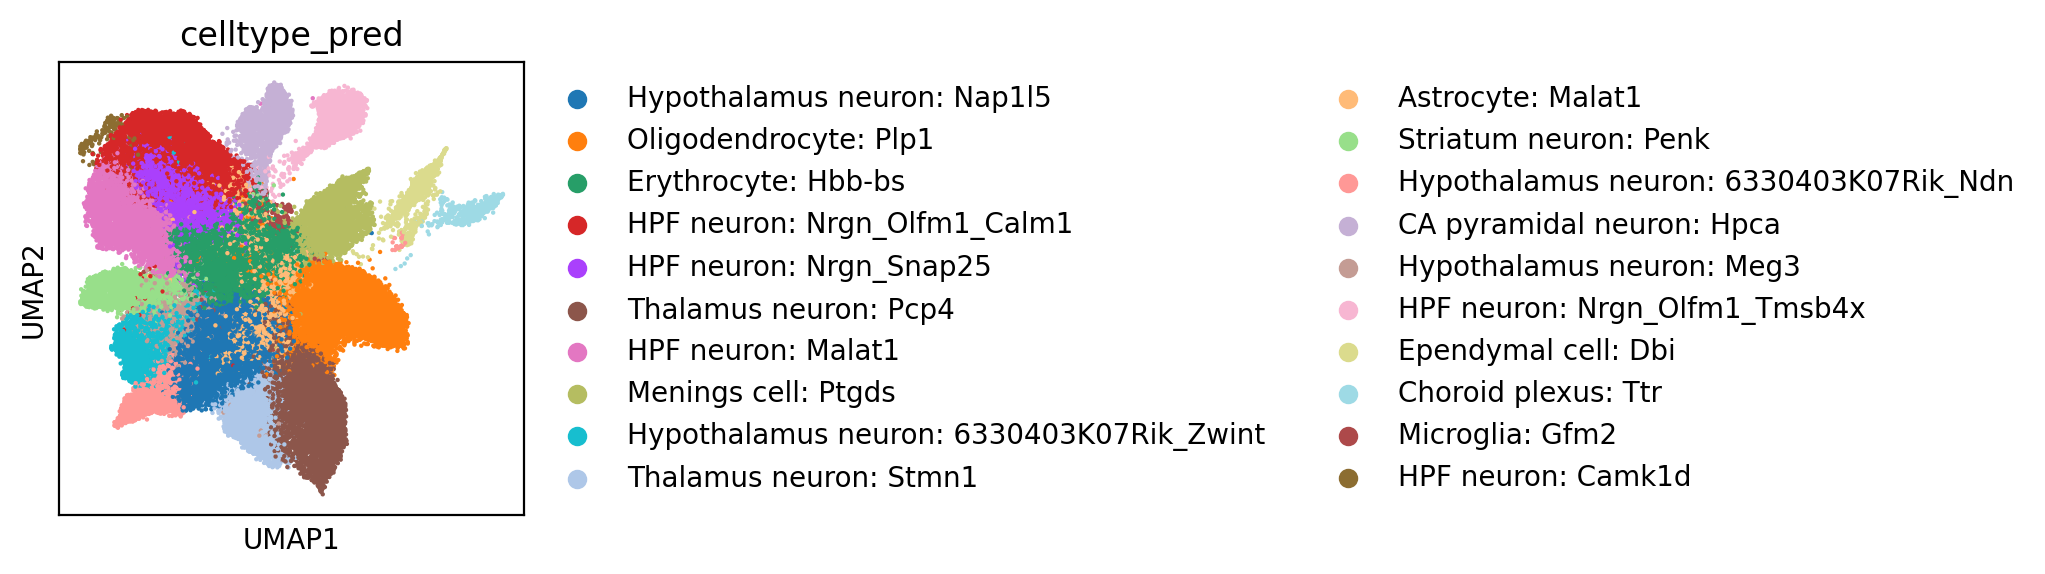

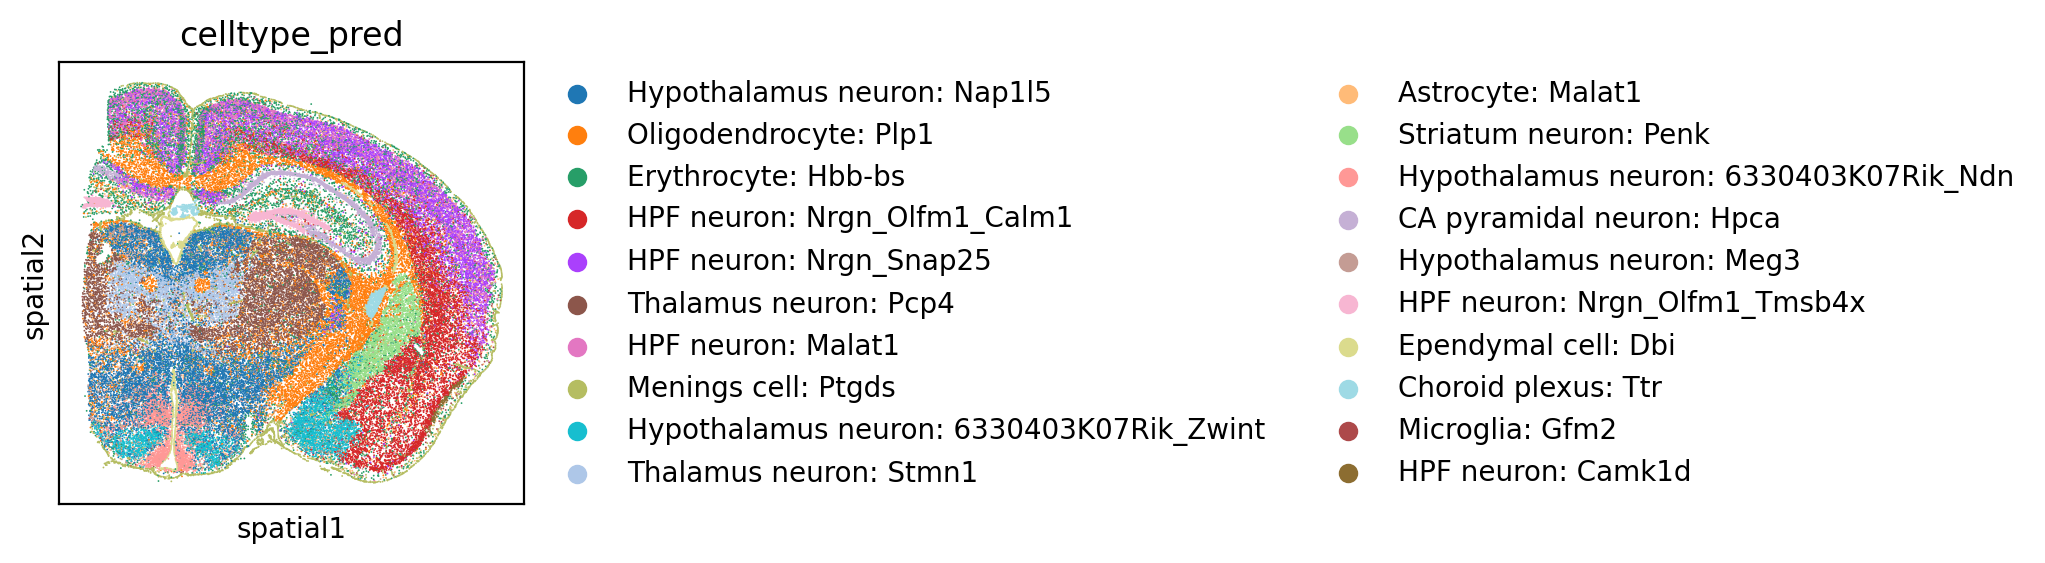

In [14]:
adata = anno.anno(adata, marker_dict, key = "leiden", n_genes = 25, rank_method = "ROC", key_add = "celltype_pred")
plt.rcParams["figure.figsize"] = [3,3]
plt.rcParams["figure.dpi"] = 200
sc.pl.umap(adata, color = "celltype_pred", s = 10, save = "T319_anno_r1.png")
sc.pl.spatial(adata, color = "celltype_pred", spot_size = 60, save = "T319_anno_r1.png")   

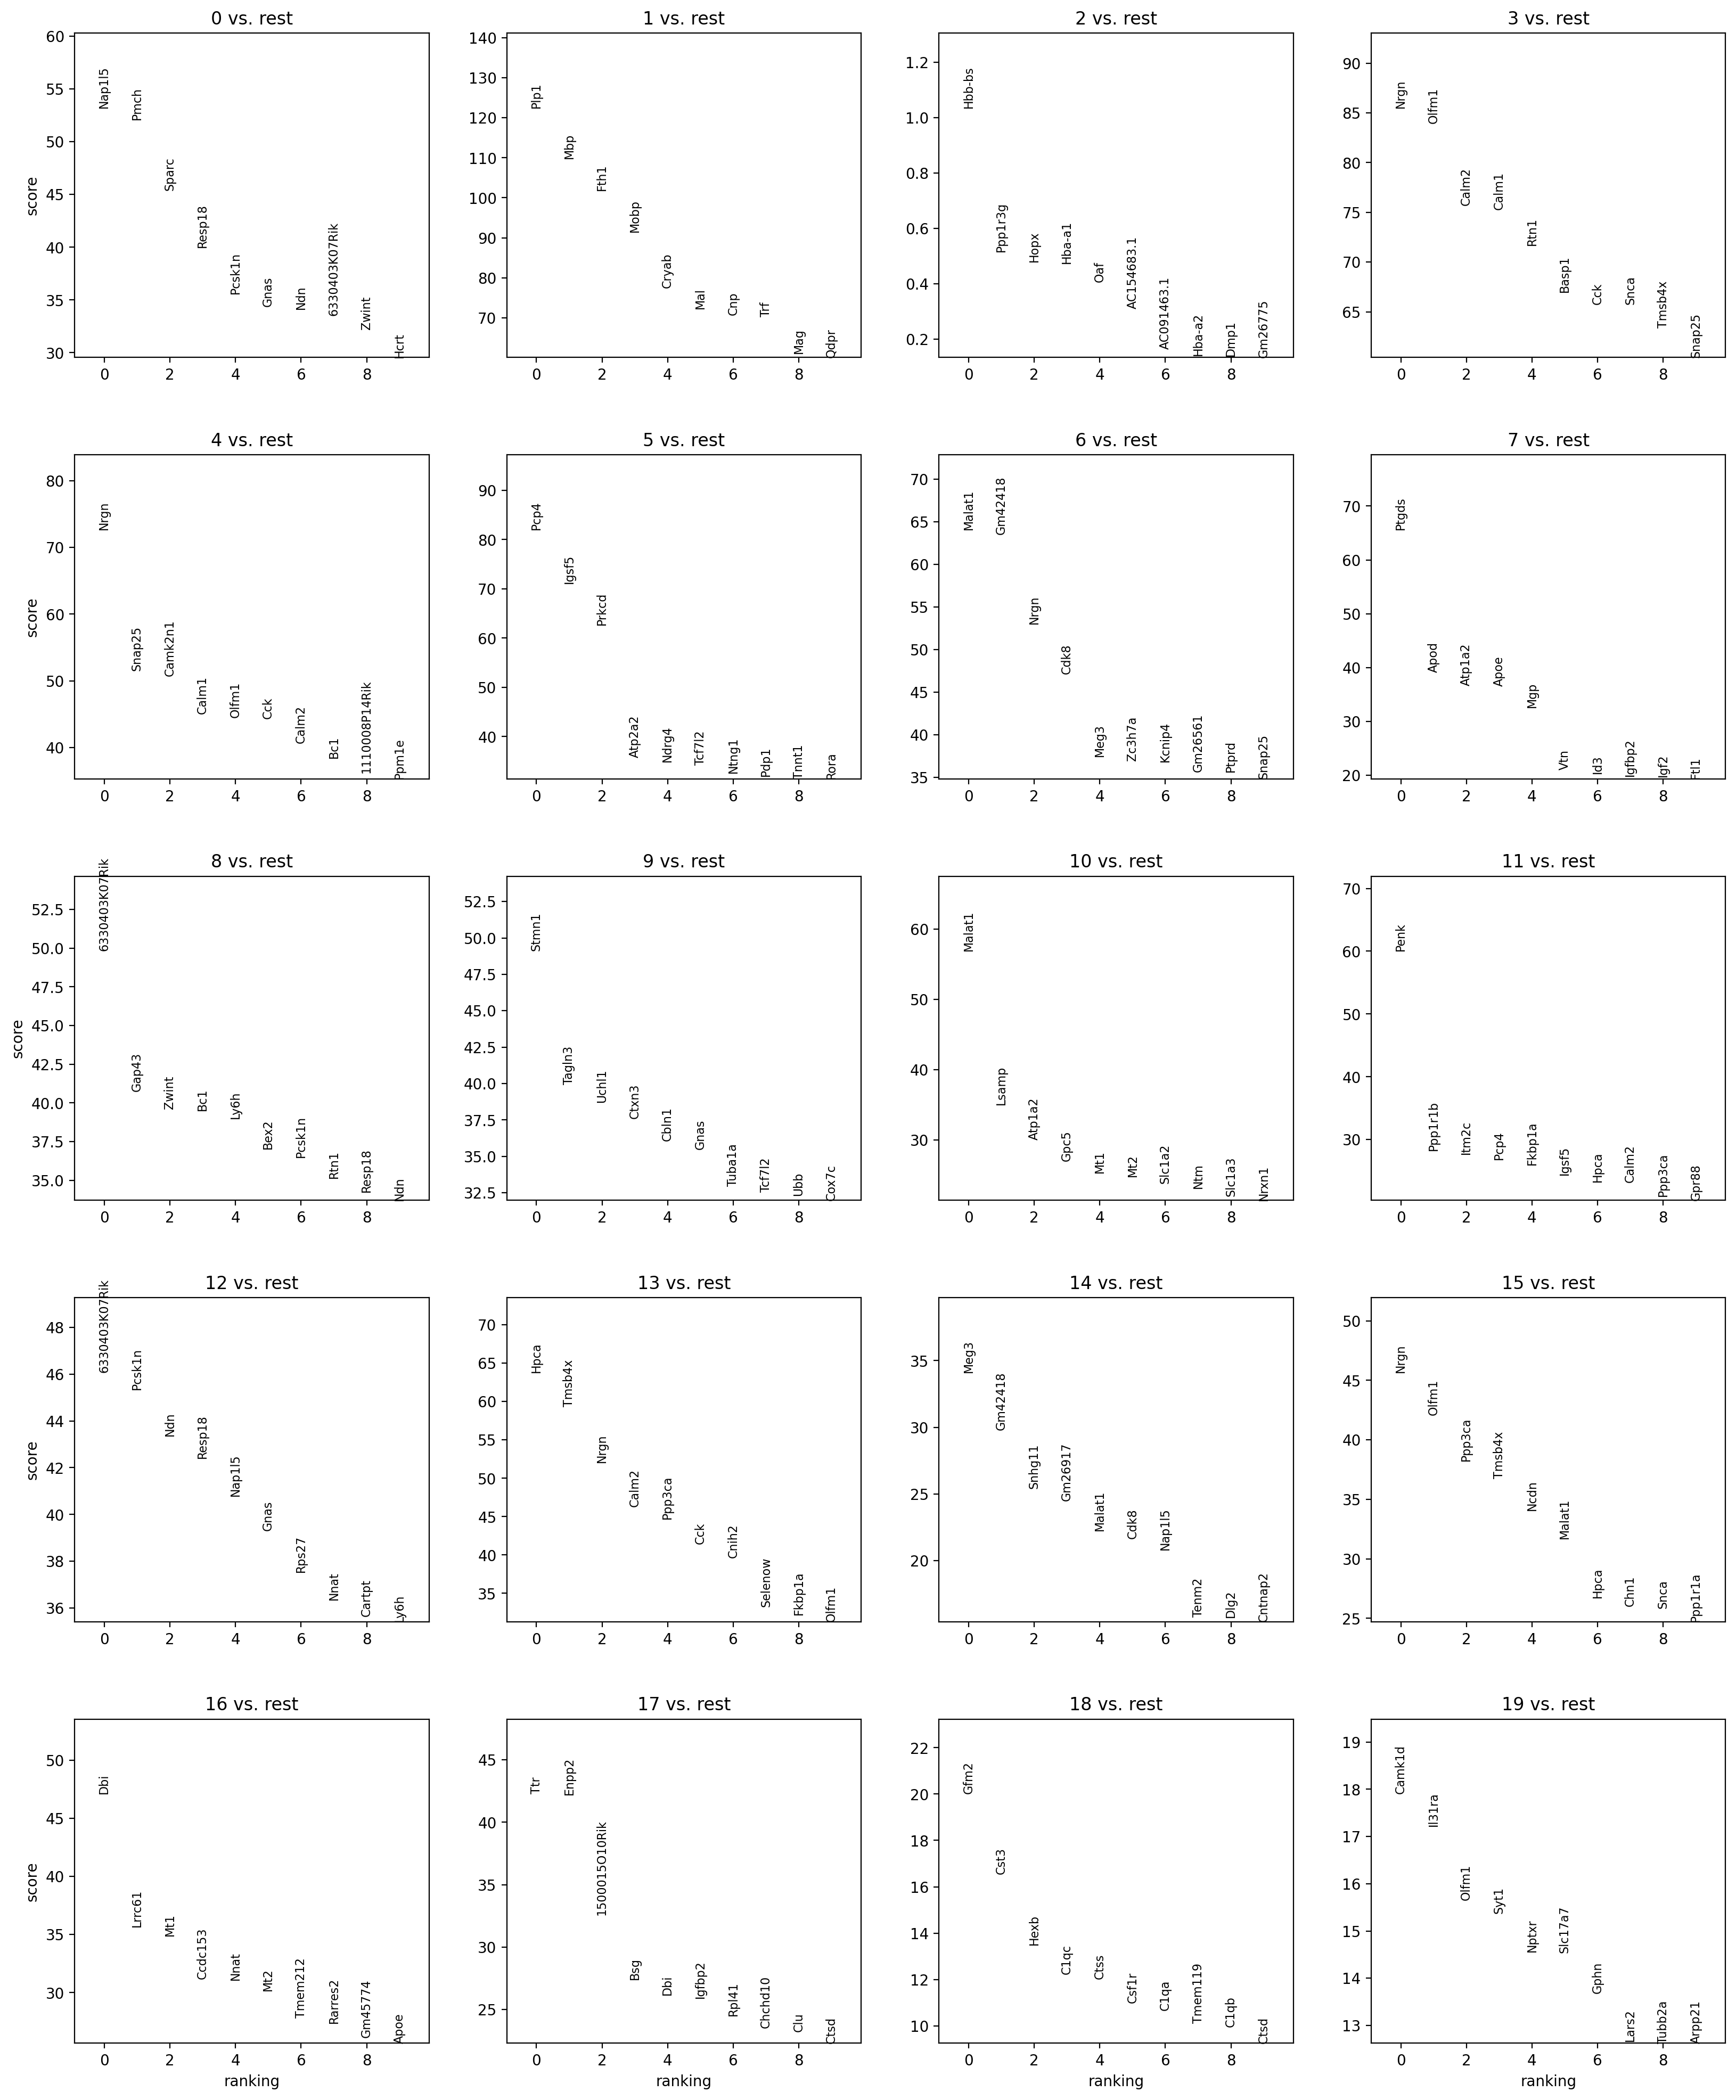

In [15]:
plt.rcParams["figure.figsize"] = [5,5]
sc.pl.rank_genes_groups(adata, n_genes = 10, sharey=False)

Figure has been saved as ./figures/T319_r1_cm.png


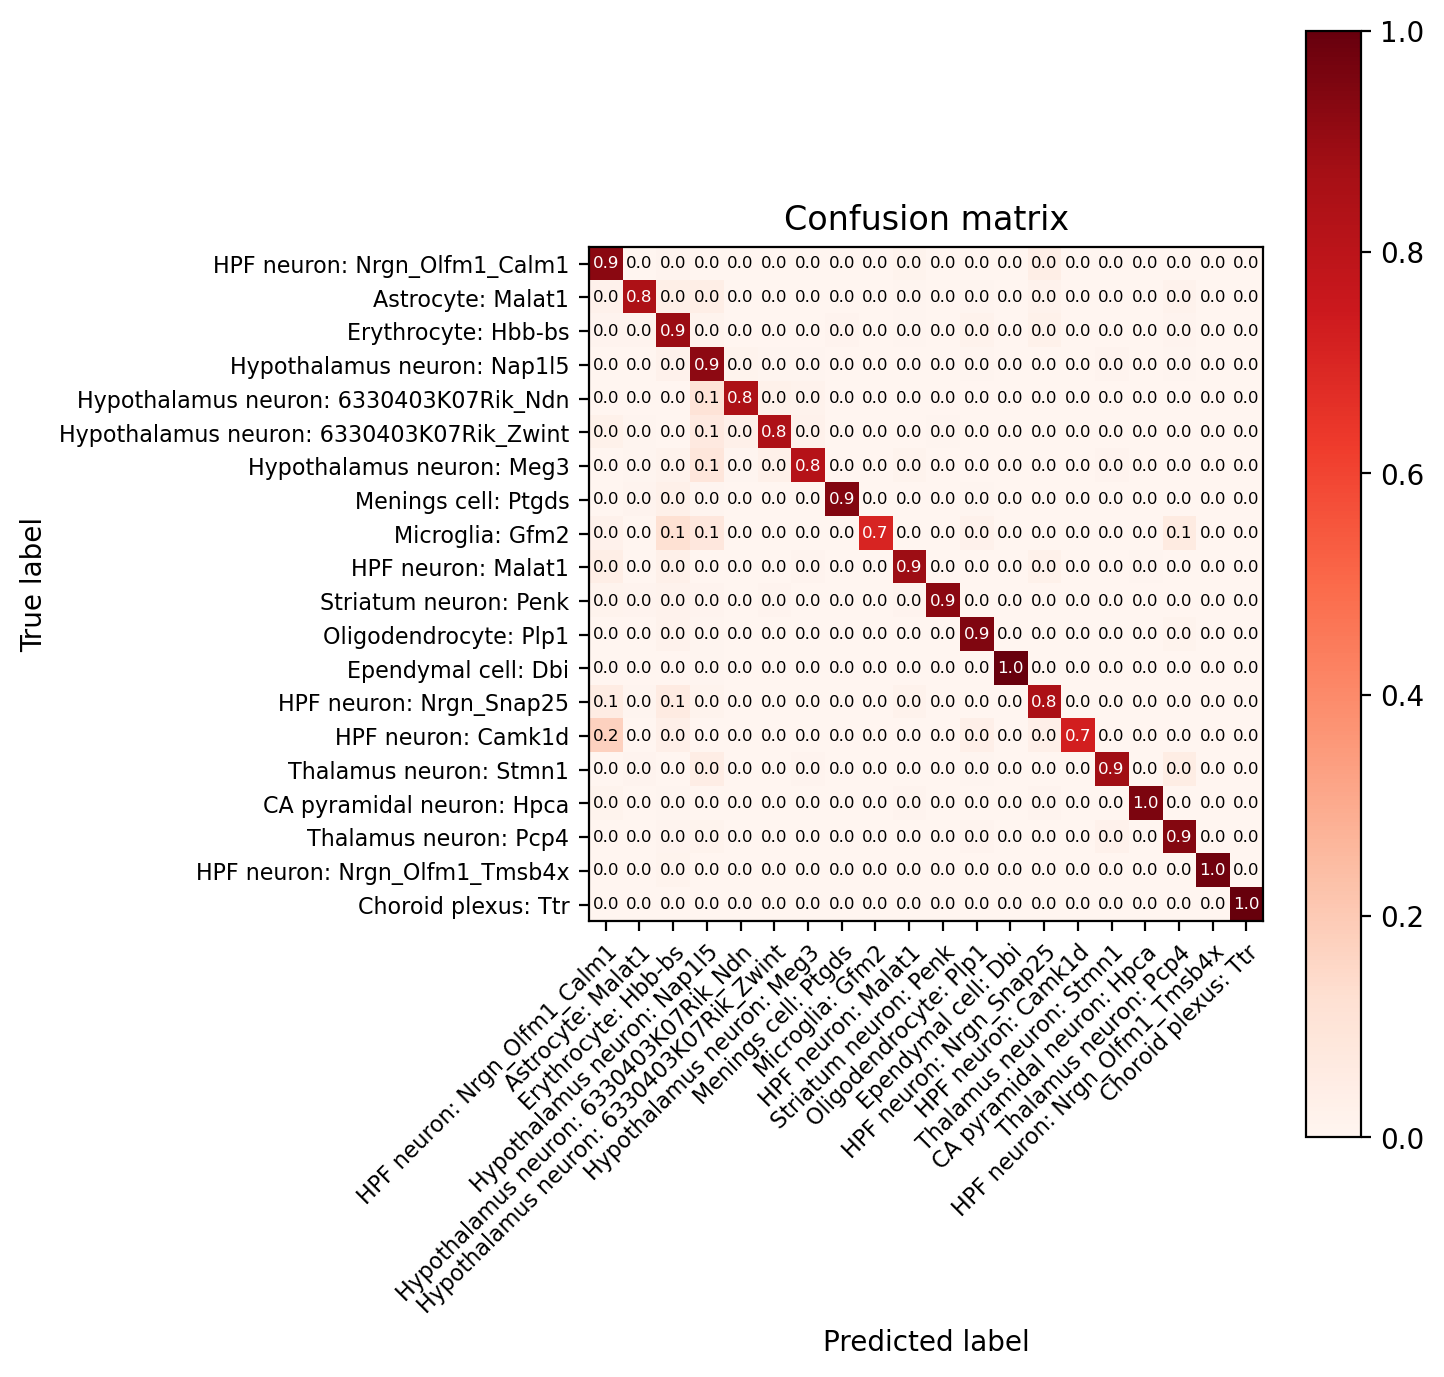

In [16]:
re, cm = anno.svm(adata, by = "pca_comp", deg = None, n_pcs = 20, key = "celltype_pred", method = "SVM")
anno.show_cm(cm, fig_size = [8, 8], save = "./figures/T319_r1_cm.png")

100 repeat is trained!
200 repeat is trained!
300 repeat is trained!
400 repeat is trained!
500 repeat is trained!
Scoring has been saved as ./figures/T319_r1_corecells.png
Low quality threshold score is 0.25
low celss: 12467, inter cells: 323, core cells: 56756


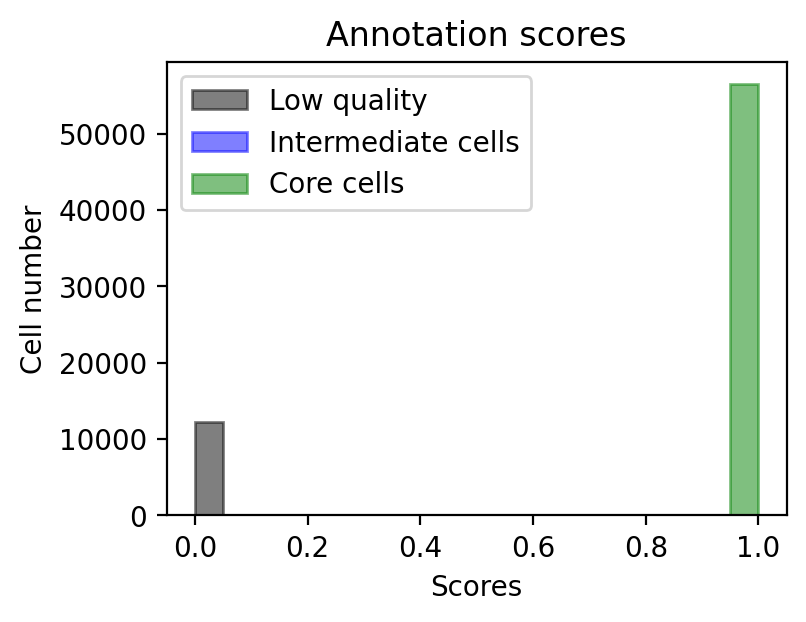

In [17]:
adata = anno.scoring(adata, n_pcs = 20, n_repeats = 100, key = "celltype_pred")
anno.show_coreCells(adata, scores = "celltype_scores", save = "./figures/T319_r1_corecells.png")

... storing 'celltype_pred' as categorical


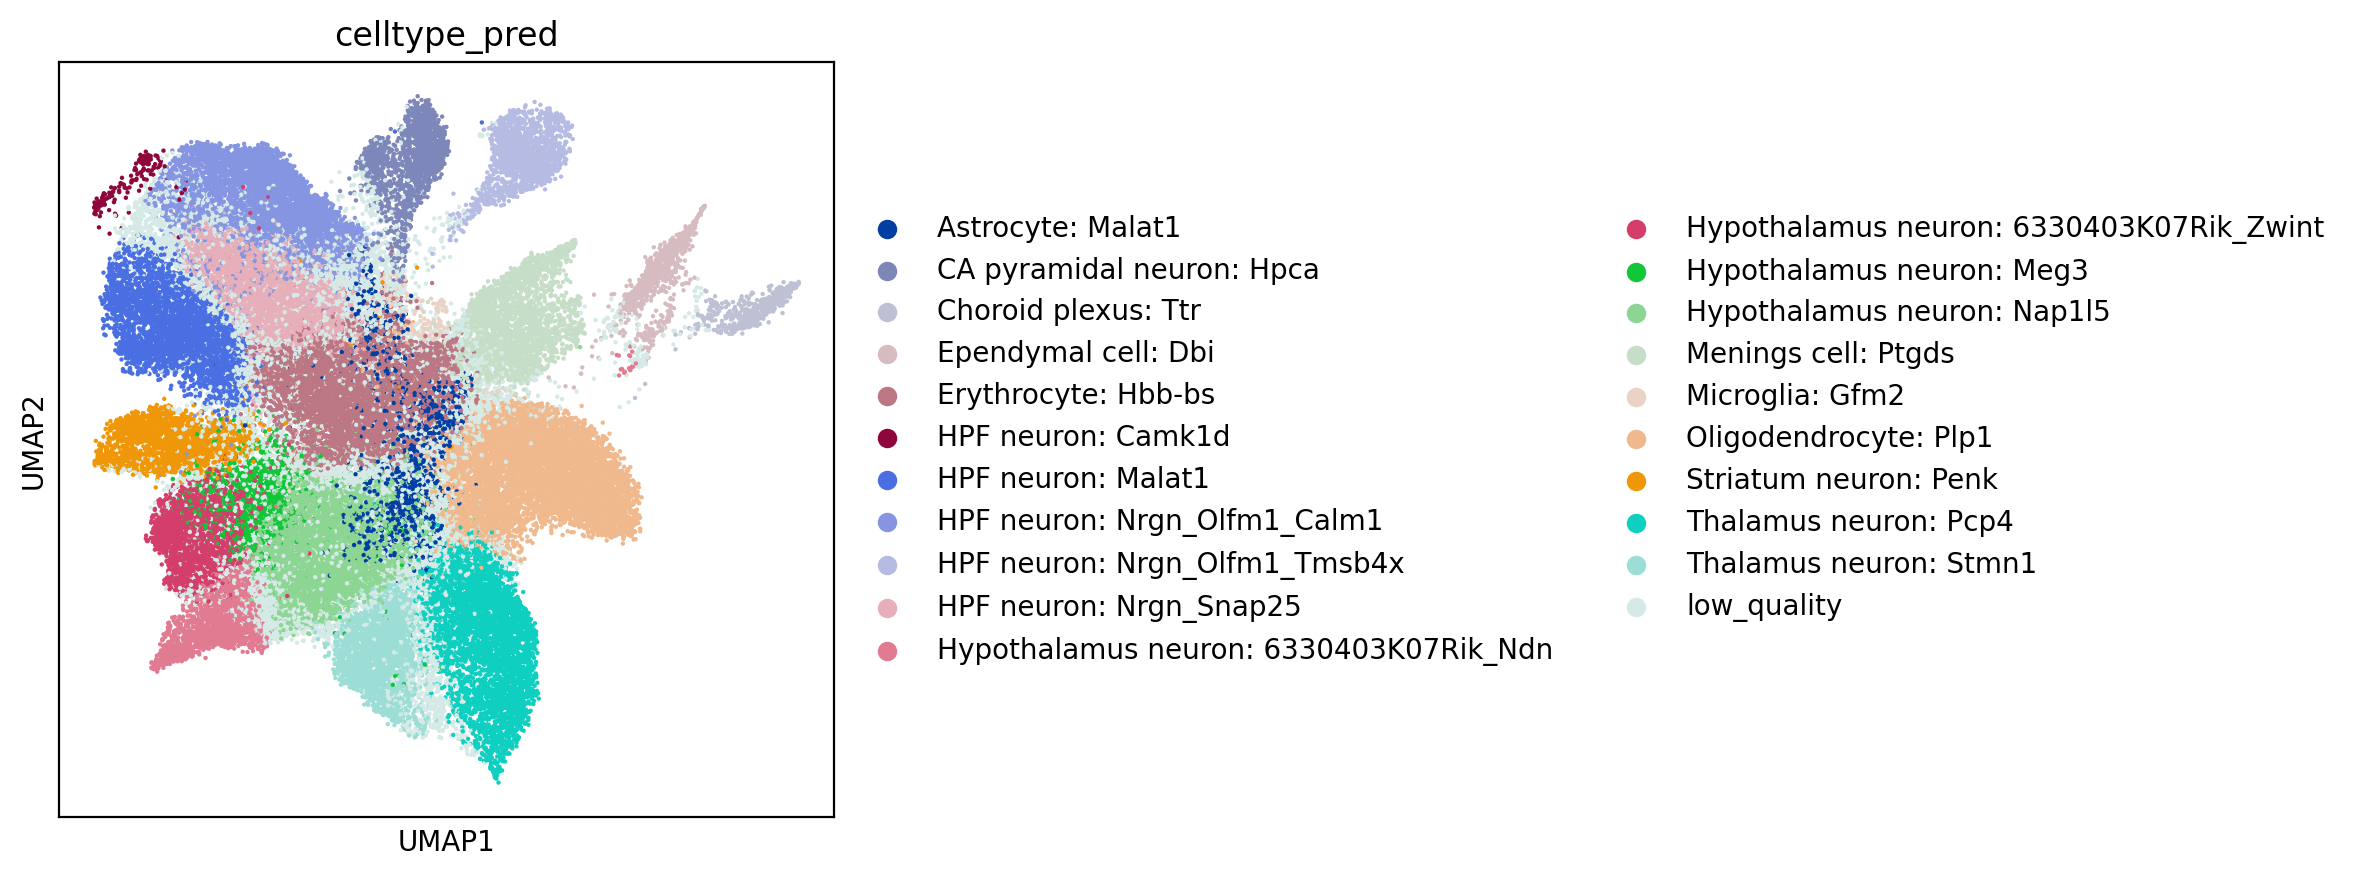

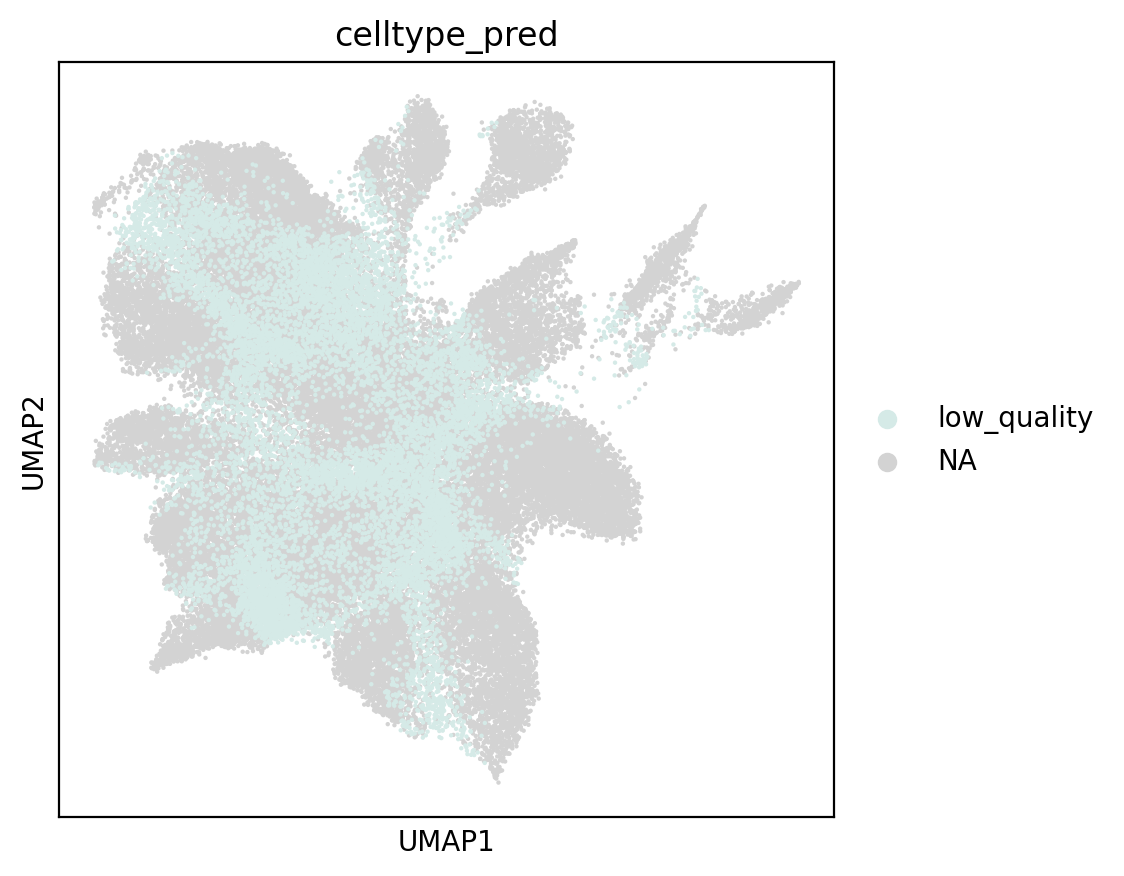

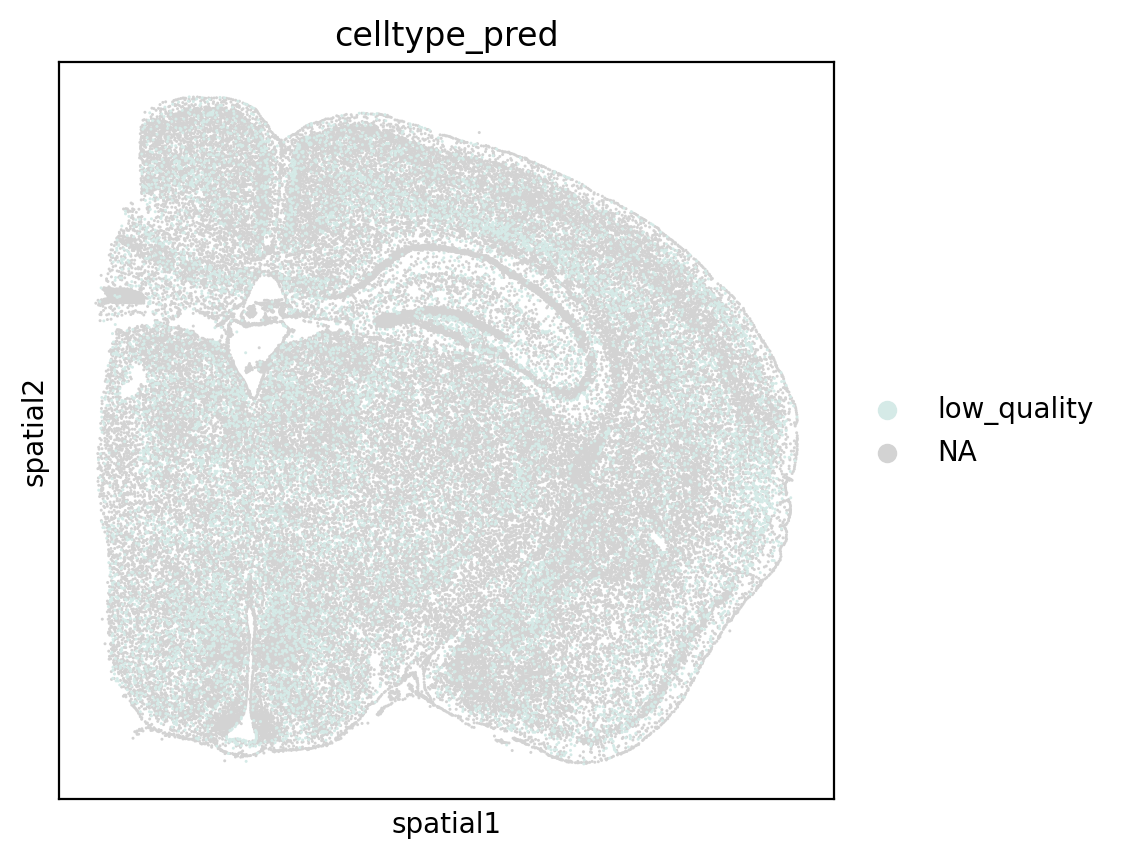

In [18]:
adata.obs["celltype_pred"] = adata.obs["celltype_pred"].astype(str)
adata.obs.loc[adata[adata.obs["celltype_scores"] <= 0.25].obs.index, "celltype_pred"] = "low_quality"
sc.pl.umap(adata, color = "celltype_pred", s = 10, save = "T319_r1_score_types.png")
sc.pl.umap(adata, color = "celltype_pred", groups = "low_quality", s = 10, save = "T319_r1_score_low.png")
sc.pl.spatial(adata, color = "celltype_pred", groups = "low_quality", spot_size = 60, save = "T319_r1_score_low.png")